<a href="https://colab.research.google.com/github/wander-asb/Repositorio-de-estudos/blob/main/DigitosKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [49]:
#Importar a tabela da base de dados
df_digitos = datasets.load_digits()

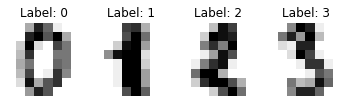

In [50]:
imagens_rotulos = list(zip(df_digitos.images, df_digitos.target))
for index, (image, label) in enumerate(imagens_rotulos[:4]):
  plt.subplot(2, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
  plt.title('Label: %i' % label)

In [51]:
X = df_digitos.data
Y = df_digitos.target

print(X.shape, Y.shape)

(1797, 64) (1797,)


In [52]:
#Divisão dos dados de teino e teste
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.30, random_state = 75)
print(X_treino.shape, testeData.shape, Y_treino.shape, testeLabels.shape)

#Divisão dos dados de treino em dados de treino e validação
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, Y_treino, test_size = 0.1, random_state = 42)
print(treinoData.shape, validData.shape, treinoLabels.shape, validLabels.shape)

(1257, 64) (540, 64) (1257,) (540,)
(1131, 64) (126, 64) (1131,) (126,)


In [53]:
#Normalização dos dados de treino
X_norm = np.mean(X, axis = 0)

#Normalização dos dados de treino e de teste
X_treino_norm = treinoData - X_norm
X_val_treino_norm = validData - X_norm
X_teste_norm = testeData - X_norm
print(treinoData.shape, validData.shape, testeData.shape)

(1131, 64) (126, 64) (540, 64)


In [57]:
#Validação do modelo

#Iremos trazer apenas K valores ímpares de range 1 -> 30
kVals = range(1, 30)

##Criaremos uma lista que guardará todos os resultados encontrados no processo de validação
acuracias = []

In [58]:
#Desenvolvimento no método de validação
for k in kVals:
  #Treinando o modelo KNN com cada valor de k
  modeloKNN = KNeighborsClassifier(n_neighbors=k)
  modeloKNN.fit(treinoData, treinoLabels)

  #Avaliando o modelo e atualizando a lista de acurácias
  score = modeloKNN.score(validData, validLabels)
  print("Com valor de K = %d, a acuracia é = %.2f%%" % (k, score * 100))
  acuracias.append(score)

Com valor de K = 1, a acuracia é = 99.21%
Com valor de K = 2, a acuracia é = 99.21%
Com valor de K = 3, a acuracia é = 100.00%
Com valor de K = 4, a acuracia é = 100.00%
Com valor de K = 5, a acuracia é = 100.00%
Com valor de K = 6, a acuracia é = 100.00%
Com valor de K = 7, a acuracia é = 99.21%
Com valor de K = 8, a acuracia é = 100.00%
Com valor de K = 9, a acuracia é = 100.00%
Com valor de K = 10, a acuracia é = 100.00%
Com valor de K = 11, a acuracia é = 100.00%
Com valor de K = 12, a acuracia é = 99.21%
Com valor de K = 13, a acuracia é = 99.21%
Com valor de K = 14, a acuracia é = 98.41%
Com valor de K = 15, a acuracia é = 98.41%
Com valor de K = 16, a acuracia é = 98.41%
Com valor de K = 17, a acuracia é = 98.41%
Com valor de K = 18, a acuracia é = 96.83%
Com valor de K = 19, a acuracia é = 96.83%
Com valor de K = 20, a acuracia é = 96.83%
Com valor de K = 21, a acuracia é = 96.83%
Com valor de K = 22, a acuracia é = 96.83%
Com valor de K = 23, a acuracia é = 97.62%
Com valor de

In [59]:
i = np.argmax(acuracias)
print("Maior acuracia encontrada: %.2f%% no valor de K: %d" % (acuracias[i] * 100, kVals[i]))

Maior acuracia encontrada: 100.00% no valor de K: 3
